<a href="https://colab.research.google.com/github/Jovanez/flask/blob/master/C%C3%B3pia_de_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 1: Um pouco mais sobre CDFs...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):**

2. **Matrícula(s):**

3. **Curso(s):**

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):**

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no 
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue', 
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo 
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale), 
           alpha = 0.5, label = 'Teórica', color = 'red', 
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

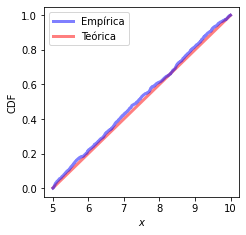

In [ ]:
plot_uniform_cdf(5, 5, 1000)

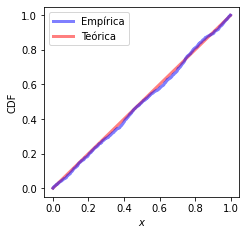

In [ ]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empírica e teórica da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import norm

In [ ]:
def plot_normal_cdf(mu, sigma, n):
  #TODO
  pass

In [ ]:
plot_normal_cdf(0, 1, 100)

In [ ]:
plot_normal_cdf(0, 1, 1000)

In [ ]:
plot_normal_cdf(5, 5, 1000)

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empírica e teórica da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import expon

In [ ]:
def plot_exponential_cdf(lambda_, n):
  # TODO
  pass

In [ ]:
plot_exponential_cdf(1, 100)

In [ ]:
plot_exponential_cdf(5, 1000)
  

### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empírica e teórica da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import pareto

In [ ]:
def plot_pareto_cdf(b, n):
  # TODO
  pass

In [ ]:
plot_pareto_cdf(3, 100)

In [ ]:
plot_pareto_cdf(2, 1000)

In [ ]:
plot_pareto_cdf(1, 1000)

In [ ]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar o forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [ ]:
def plot_pareto_ccdf(b, n):
  #TODO
  pass

In [ ]:
plot_pareto_ccdf(3, 1000)

In [ ]:
plot_pareto_ccdf(2, 1000)

In [ ]:
plot_pareto_ccdf(1, 1000)

In [ ]:
plot_pareto_ccdf(0.5, 1000)

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação** e, neste caso, vale 50% da nota.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.